## Machine learning models 

In [15]:
#import libraries 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd 
import joblib


In [2]:
#load training and testing dataset
df_train =  pd.read_csv("../EDA/train.csv")
df_test =  pd.read_csv("../EDA/test.csv")

In [3]:
# find the correlation between the target and other variables 
df_train.corr()['Price']


Year           0.365644
Engine_Size    0.294890
Mileage       -0.246966
Price          1.000000
Negotiable          NaN
Name: Price, dtype: float64

In [4]:
#remove the price from the dataset
X_train = df_train.drop(['Price'],axis=1)
y_train = df_train['Price']

X_test = df_test.drop(['Price'],axis=1)
y_test = df_test['Price']

In [5]:

#numerical variables 
num_pipe1=make_pipeline(StandardScaler())

#categorical variables 
cat_pipe2=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

columns_trans=make_column_transformer((num_pipe1,['Year','Mileage','Engine_Size']),
                           (cat_pipe2,['Make','Type','Origin','Color','Options','Fuel_Type','Gear_Type','Region','Negotiable','Manu_Country']),
                          remainder='passthrough')

# By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through.*


## Linear regression model

In [17]:


# create linear regression
LR_pipeline=make_pipeline(columns_trans,LinearRegression())
LR_pipeline.fit(X_train,y_train)
y_pred= LR_pipeline.predict(X_test)


#print the score of trining and testing
LR_pipeline.score(X_train, y_train), LR_pipeline.score(X_test, y_test)

# save the model
file_name = "LR_model.sav"
joblib.dump(LR_pipeline,file_name)


print("R2 score on Traing set: %.2f"% LR_pipeline.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% LR_pipeline.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

# Load the model
loaded_model = joblib.load(file_name)
result = loaded_model.score(X_test,y_test)
result

R2 score on Traing set: 0.77
R2 score on Testing set: 0.69
Mean squared error: 587391349.68


0.6871590960641836

## Descion Tree model

In [18]:
# create DT regression model 

DS_R= make_pipeline(columns_trans,DecisionTreeRegressor())

DS_R.fit(X_train, y_train)
y_pred2= DS_R.predict(X_test)

# save the model
file_name2 = "DS_R.sav"
joblib.dump(DS_R,file_name2)


print("R2 score on Traing set: %.2f"% DS_R.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% DS_R.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred2))

# Load the model
loaded_model = joblib.load(file_name2)
result = loaded_model.score(X_test,y_test)
result

R2 score on Traing set: 1.00
R2 score on Testing set: 0.62
Mean squared error: 713525818.62


0.6199806786384301

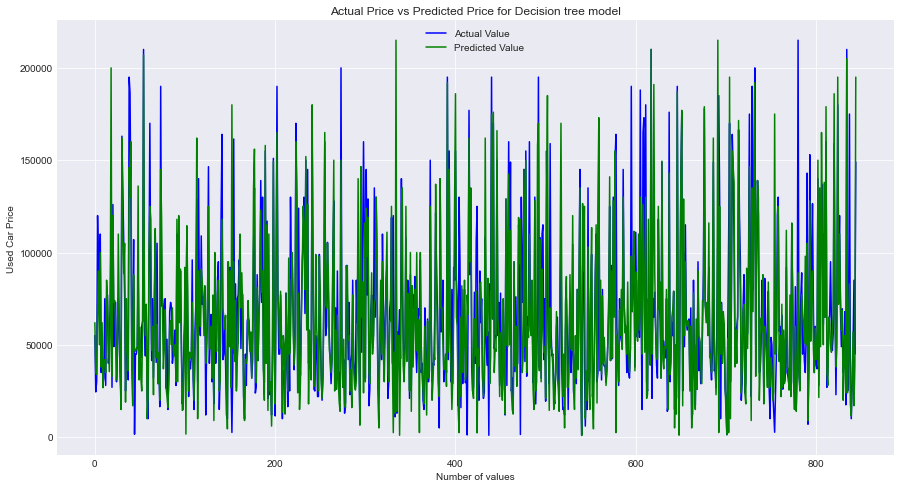

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred2, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Decision tree model')
plt.xlabel('Number of values')
plt.ylabel('Used Car Price')
plt.legend()
plt.show()

## KNN model

In [19]:
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor


# create KNN model
knn_model= make_pipeline(columns_trans,KNeighborsRegressor(n_neighbors=3))

knn_model.fit(X_train, y_train)
y_pred3= knn_model.predict(X_test)


# save the model
file_name3 = "knn_model.sav"
joblib.dump(knn_model,file_name3)

print("R2 score on Traing set: %.2f"% knn_model.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% knn_model.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred3))

# Load the model
loaded_model = joblib.load(file_name3)
result = loaded_model.score(X_test,y_test)
result

R2 score on Traing set: 0.85
R2 score on Testing set: 0.66
Mean squared error: 636993571.52


0.6607412675996522

## Testing Dataset

In [41]:
testing_data = pd.read_csv('../data/test_set/cars_test.csv')

In [42]:
testing_data.head()

,Unnamed: 0,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,5580,Chevrolet,Tahoe,2016,Saudi,Another Color,Semi Full,5.3,Gas,Automatic,168000,Riyadh,114500,False
1,5060,Ford,Taurus,2014,Saudi,Brown,Standard,3.5,Gas,Automatic,211886,Al-Ahsa,42000,False
2,7203,Honda,Accord,2018,Saudi,White,Semi Full,1.5,Gas,Automatic,140000,Khobar,85000,False
3,3847,Nissan,Sunny,2011,Saudi,White,Standard,1.4,Gas,Manual,290,Riyadh,7000,False
4,5667,Chrysler,C300,2008,Other,Black,Full,5.7,Gas,Automatic,114000,Riyadh,20000,False


In [43]:
testing_data.shape

(1607, 14)

In [44]:
# Drop 'Unnamed: 0' column 
testing_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [45]:
# Drop all the observations in [Price] column with the values (0 and 1)
testing_data.drop(testing_data.loc[testing_data['Price'] <= 1].index, inplace=True)

In [46]:
testing_data.Price.describe()

count      1101.000000
mean      76891.416894
std       69596.265650
min         850.000000
25%       35000.000000
50%       59000.000000
75%       91500.000000
max      696000.000000
Name: Price, dtype: float64

In [47]:
# find 95% for the Price column
testing_data.Price.quantile(0.99)

360000.0

In [48]:
#calculate the extreme values 
price_ext = sorted(testing_data["Price"])
quantile = np.percentile(price_ext,99)

In [49]:
# drop the extreme values from the dataframe 
testing_data=testing_data[(testing_data.Price < quantile)]
testing_data.shape

(1089, 13)

In [50]:
testing_data.Mileage.describe()

count    1.089000e+03
mean     1.443013e+05
std      2.454955e+05
min      1.000000e+02
25%      4.800000e+04
50%      1.039000e+05
75%      1.780000e+05
max      3.640000e+06
Name: Mileage, dtype: float64

In [51]:
#calculate the extreme values 
mileage_ext=sorted(testing_data["Mileage"])
quantile= np.percentile(mileage_ext,99)

In [52]:
# drop rows that contain extreme values in the Mileage 
testing_data=testing_data[(testing_data.Mileage < quantile)]

In [54]:
testing_data.shape

(1078, 13)

In [56]:
df_country = pd.read_csv("../EDA/Cars_Origin.csv")

In [57]:
#convert the dataframe to dict 
country_dict = dict(zip(df_country.Make, df_country.Country))

In [59]:
#create new column  for the country of car manufacturers
testing_data['Manu_Country'] = testing_data['Make'].map(country_dict) 

#create new column  for the country of car manufacturers
testing_data['Manu_Country'] = testing_data['Make'].map(country_dict).fillna('Other')


In [60]:
#list all country of car manufacturers per percentiles 
testing_data.Manu_Country.value_counts(normalize=True).mul(100)

Japan          39.888683
America        26.623377
South Korea    20.037106
Germany         7.513915
England         2.319109
China           1.762523
France          1.113173
Italy           0.371058
Other           0.371058
Name: Manu_Country, dtype: float64

In [61]:
#remove the price from the dataset
X_test = testing_data.drop(['Price'],axis=1)
y_test = testing_data['Price']

#numerical variables 
num_pipe1=make_pipeline(StandardScaler())

#categorical variables 
cat_pipe2=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

columns_trans=make_column_transformer((num_pipe1,['Year','Mileage','Engine_Size']),
                           (cat_pipe2,['Make','Type','Origin','Color','Options','Fuel_Type','Gear_Type','Region','Negotiable','Manu_Country']),
                          remainder='passthrough')

# By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through.*


In [62]:
# Load the model LR
loaded_model = joblib.load('LR_model.sav')
result = loaded_model.score(X_test,y_test)
result

0.5704914025245593

In [63]:
# Load the model DT
loaded_model = joblib.load('DS_R.sav')
result = loaded_model.score(X_test,y_test)
result

0.5994256670904042

In [64]:
# Load the model KNN
loaded_model = joblib.load('knn_model.sav')
result = loaded_model.score(X_test,y_test)
result

0.6536589618733022